In [1]:
import pandas as pd
import pathlib
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_data_folder = pathlib.Path().absolute()/'monitor'
data_filenames = [i for i in path_data_folder.glob('*')]
data_filenames

[PosixPath('/home/relogu/repos/fertilizer/monitor/node0_2022_10_19-02:26:00_PM_openimage.csv'),
 PosixPath('/home/relogu/repos/fertilizer/monitor/node1_2022_10_19-12:31:28_PM_openimage.csv'),
 PosixPath('/home/relogu/repos/fertilizer/monitor/2022_10_18-03:15:29_PM_openimage.csv'),
 PosixPath('/home/relogu/repos/fertilizer/monitor/2022_10_18-03:09:49_PM_openimage.csv'),
 PosixPath('/home/relogu/repos/fertilizer/monitor/2022_10_18-03:13:31_PM_openimage.csv'),
 PosixPath('/home/relogu/repos/fertilizer/monitor/node1_2022_10_19-12:46:00_PM_openimage.csv'),
 PosixPath('/home/relogu/repos/fertilizer/monitor/2022_10_18-03:42:19_PM_openimage.csv'),
 PosixPath('/home/relogu/repos/fertilizer/monitor/2022_10_18-11:47:10_AM_openimage.csv'),
 PosixPath('/home/relogu/repos/fertilizer/monitor/node0_2022_10_19-12:46:00_PM_openimage.csv'),
 PosixPath('/home/relogu/repos/fertilizer/monitor/2022_10_18-03:00:40_PM_openimage.csv'),
 PosixPath('/home/relogu/repos/fertilizer/monitor/node0_2022_10_19-12:31:28_

In [3]:
GPU_ID_NODE_0, GPU_ID_NODE_1 = 3, 5
df0 = pd.read_csv(data_filenames[0])
df0 = df0[df0[' index'] == GPU_ID_NODE_0].reset_index().sort_values(by='timestamp', ascending=True)
df0['timestamp'] = pd.to_datetime(df0['timestamp']).map(lambda a: time.mktime(a.timetuple())).astype(float)
df0['timestamp'] = df0['timestamp'].map(lambda a: a - df0['timestamp'][0])
df1 = pd.read_csv(data_filenames[-1])
df1 = df1[(df1[' index'] == 0) | (df1[' index'] == 5)].reset_index().sort_values(by='timestamp', ascending=True)
df1['timestamp'] = pd.to_datetime(df1['timestamp']).map(lambda a: time.mktime(a.timetuple())).astype(float)
df1['timestamp'] = df1['timestamp'].map(lambda a: a - df1['timestamp'][0])
# delta = df0['timestamp'][0]-df1['timestamp'][0]
# df0['timestamp'] = df0['timestamp'].map(lambda a: a - delta)

In [4]:

df = pd.concat([df0, df1]).reset_index()
df = df.sort_values(by='timestamp', ascending=True)
# df = df.drop(columns=['index', 'level_0'])
df

,level_0,index,timestamp,name,index,pci.bus_id,utilization.gpu [%],utilization.memory [%],memory.total [MiB],memory.free [MiB],memory.used [MiB]
0,0,3,0.0,NVIDIA GeForce GTX 1080 Ti,3,00000000:61:00.0,0 %,0 %,11178 MiB,11176 MiB,2 MiB
316119,154,616,0.0,Tesla V100-PCIE-32GB,0,00000000:1A:00.0,0 %,0 %,32510 MiB,32510 MiB,0 MiB
316120,155,621,0.0,NVIDIA A40,5,00000000:B2:00.0,0 %,0 %,45634 MiB,45634 MiB,0 MiB
316121,156,624,0.0,Tesla V100-PCIE-32GB,0,00000000:1A:00.0,0 %,0 %,32510 MiB,32510 MiB,0 MiB
316122,157,629,0.0,NVIDIA A40,5,00000000:B2:00.0,0 %,0 %,45634 MiB,45634 MiB,0 MiB
...,...,...,...,...,...,...,...,...,...,...,...
315944,315944,2527555,1423.0,NVIDIA GeForce GTX 1080 Ti,3,00000000:61:00.0,0 %,0 %,11178 MiB,11176 MiB,2 MiB
315943,315943,2527547,1423.0,NVIDIA GeForce GTX 1080 Ti,3,00000000:61:00.0,0 %,0 %,11178 MiB,11176 MiB,2 MiB
315942,315942,2527539,1423.0,NVIDIA GeForce GTX 1080 Ti,3,00000000:61:00.0,0 %,0 %,11178 MiB,11176 MiB,2 MiB
315952,315952,2527619,1423.0,NVIDIA GeForce GTX 1080 Ti,3,00000000:61:00.0,0 %,0 %,11178 MiB,11176 MiB,2 MiB


In [5]:
df[' utilization.gpu [%]'] = df[' utilization.gpu [%]'].astype(str).map(lambda a: a.replace('%', '')).astype(float)
df[' utilization.memory [%]'] = df[' utilization.memory [%]'].astype(str).map(lambda a: a.replace('%', '')).astype(float)
df[' memory.total [MiB]'] = df[' memory.total [MiB]'].astype(str).map(lambda a: a.replace('MiB', '')).astype(float)
df[' memory.free [MiB]'] = df[' memory.free [MiB]'].astype(str).map(lambda a: a.replace('MiB', '')).astype(float)
df[' memory.used [MiB]'] = df[' memory.used [MiB]'].astype(str).map(lambda a: a.replace('MiB', ''))#.astype(int)
# df['timestamp'] = pd.to_datetime(df['timestamp']).map(lambda a: time.mktime(a.timetuple())).astype(float)
# time_zero = df['timestamp'][0]
# df['timestamp'] = df['timestamp'].map(lambda a: a-time_zero)
df

,level_0,index,timestamp,name,index,pci.bus_id,utilization.gpu [%],utilization.memory [%],memory.total [MiB],memory.free [MiB],memory.used [MiB]
0,0,3,0.0,NVIDIA GeForce GTX 1080 Ti,3,00000000:61:00.0,0.0,0.0,11178.0,11176.0,2
316119,154,616,0.0,Tesla V100-PCIE-32GB,0,00000000:1A:00.0,0.0,0.0,32510.0,32510.0,0
316120,155,621,0.0,NVIDIA A40,5,00000000:B2:00.0,0.0,0.0,45634.0,45634.0,0
316121,156,624,0.0,Tesla V100-PCIE-32GB,0,00000000:1A:00.0,0.0,0.0,32510.0,32510.0,0
316122,157,629,0.0,NVIDIA A40,5,00000000:B2:00.0,0.0,0.0,45634.0,45634.0,0
...,...,...,...,...,...,...,...,...,...,...,...
315944,315944,2527555,1423.0,NVIDIA GeForce GTX 1080 Ti,3,00000000:61:00.0,0.0,0.0,11178.0,11176.0,2
315943,315943,2527547,1423.0,NVIDIA GeForce GTX 1080 Ti,3,00000000:61:00.0,0.0,0.0,11178.0,11176.0,2
315942,315942,2527539,1423.0,NVIDIA GeForce GTX 1080 Ti,3,00000000:61:00.0,0.0,0.0,11178.0,11176.0,2
315952,315952,2527619,1423.0,NVIDIA GeForce GTX 1080 Ti,3,00000000:61:00.0,0.0,0.0,11178.0,11176.0,2


In [ ]:
df.columns

<AxesSubplot:xlabel='timestamp', ylabel=' utilization.gpu [%]'>

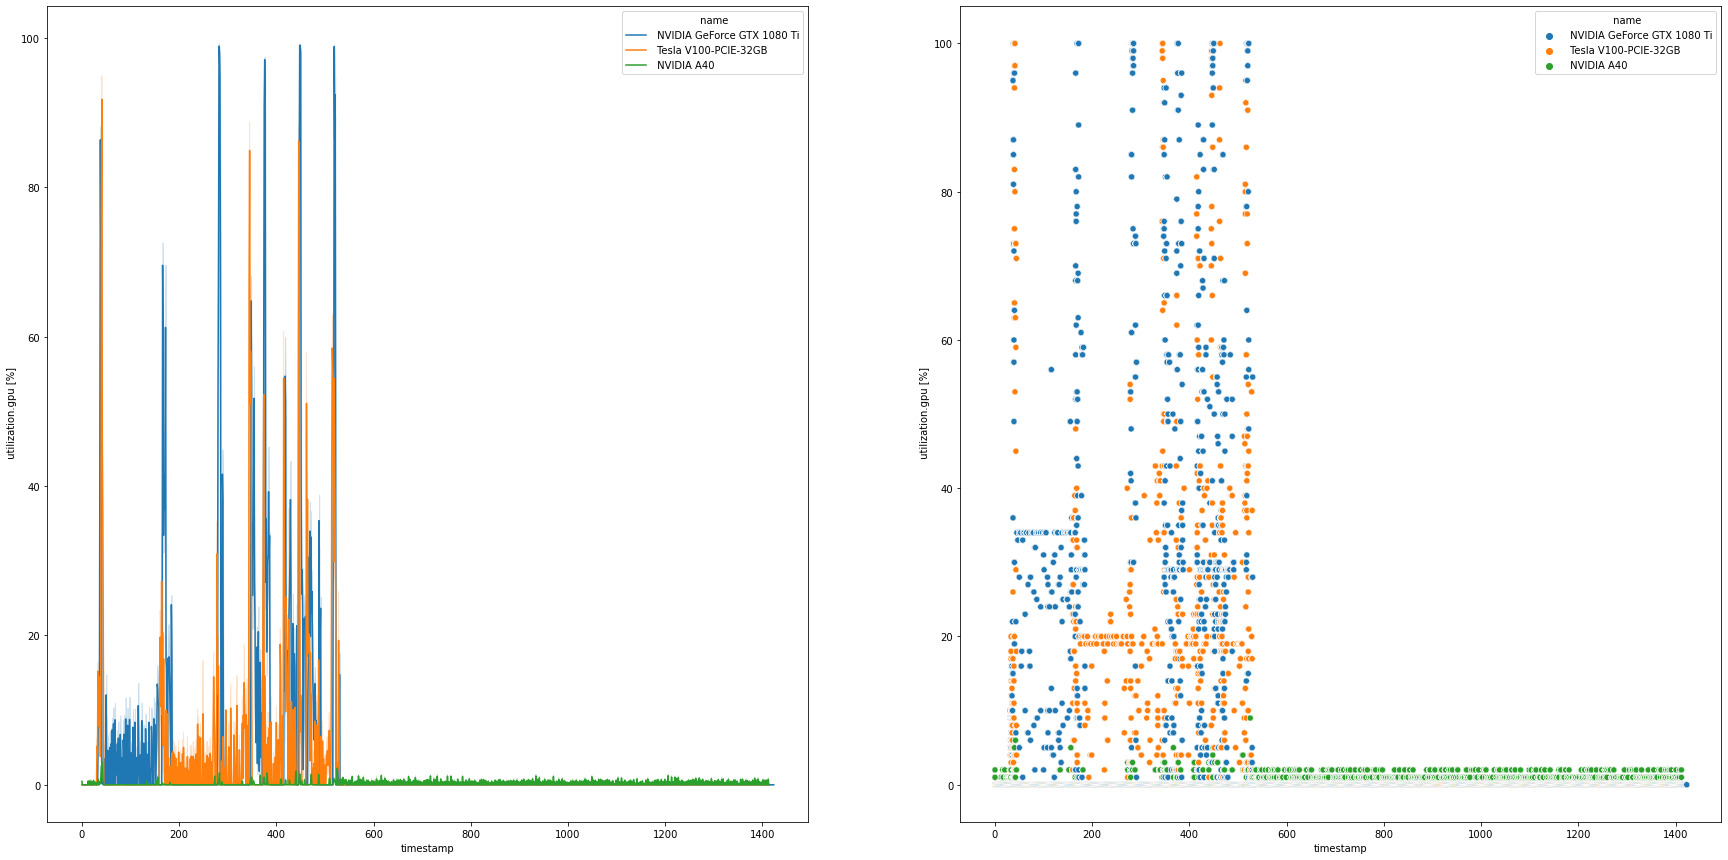

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(30,15))
sns.lineplot(x='timestamp', y=' utilization.gpu [%]', ax=axs[0], data=df, hue=' name')
sns.scatterplot(x='timestamp', y=' utilization.gpu [%]', ax=axs[1], data=df, hue=' name')

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(30,15))
sns.lineplot(x='timestamp', y=' utilization.memory [%]', ax=axs[0], data=df, hue=' name')
sns.scatterplot(x='timestamp', y=' utilization.memory [%]', ax=axs[1], data=df, hue=' name')

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(30,15))
sns.lineplot(x='timestamp', y=' memory.used [MiB]', ax=axs[0], data=df, hue=' name')
sns.scatterplot(x='timestamp', y=' memory.used [MiB]', ax=axs[1], data=df, hue=' name')